In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
#构建XGBOOst模型
from xgboost.sklearn import XGBClassifier

In [2]:
data = pd.read_csv(r"C:\Users\zhouy\Desktop\数据科学技术与应用\期末大论文\df_pca.csv")
data.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Income,Time
0,0,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced,No,5933.07,37.49
1,0,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,No,10396.98,62.46
2,1,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Yes,6013.26,36.48


In [3]:
data=data.drop('Gender',axis=1)

In [4]:
T=LabelEncoder() #初始化
data["BusinessTravel"]=T.fit_transform(data["BusinessTravel"])
data["Department"]=T.fit_transform(data["Department"])
data["EducationField"]=T.fit_transform(data["EducationField"])
#data["Gender"]=T.fit_transform(data["Gender"])
data["JobRole"]=T.fit_transform(data["JobRole"])
data["MaritalStatus"]=T.fit_transform(data["MaritalStatus"])
data["OverTime"]=T.fit_transform(data["OverTime"])

In [5]:
#数据划分
from sklearn import model_selection
x=data.drop(["Attrition"],axis=1)#删除列
y=data["Attrition"]

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,
        random_state=10,
        test_size=0.3,
        stratify=data["Attrition"])#保持比例

In [6]:
xgbt=XGBClassifier(n_estimators=100,
                  learning_rate=0.3,
                  random_state=5,
                  objective="binary:logistic",#目标函数
                  scale_pos_weight=100)#正样本权重
xgbt.fit(x_train,y_train)
y_pred_xgbt=xgbt.predict(x_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred_xgbt)
print(confusion_matrix)

[[235  42]
 [ 35  18]]


In [8]:
#输出评价报告和指标
print(classification_report(y_test,y_pred_xgbt))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       277
           1       0.30      0.34      0.32        53

    accuracy                           0.77       330
   macro avg       0.59      0.59      0.59       330
weighted avg       0.78      0.77      0.77       330



In [9]:
#网格搜素最佳参数
from sklearn.model_selection import GridSearchCV
param_grid=[{"n_estimators":[10,20,30,50],"scale_pos_weight":[50,100,200,500,1000,2000]}]
grid_search=GridSearchCV(xgbt,param_grid,scoring="f1")

In [10]:
#输出最佳参数组合
grid_search.fit(x,y)
print("best params: ",grid_search.best_params_)
print("best score: ",grid_search.best_score_)

best params:  {'n_estimators': 50, 'scale_pos_weight': 50}
best score:  0.41943054348911113


In [11]:
#利用最佳参数组合，得到模型最终评价结果
from sklearn.metrics import recall_score,precision_score,f1_score
best_estimator=grid_search.best_estimator_
print("test precision: {:.3f}".format(precision_score(y_test,best_estimator.predict(x_test))))
print("test recall: {:.3f}".format(recall_score(y_test,best_estimator.predict(x_test))))
print("test f1-score: {:.3f}".format(f1_score(y_test,best_estimator.predict(x_test))))

test precision: 0.679
test recall: 1.000
test f1-score: 0.809


In [12]:
#输出最佳参数组合后的测试集预测结果混淆矩阵
print(classification_report(y_test,best_estimator.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       277
           1       0.68      1.00      0.81        53

    accuracy                           0.92       330
   macro avg       0.84      0.95      0.88       330
weighted avg       0.95      0.92      0.93       330



In [13]:
y_pred_best=best_estimator.predict(x_test)

In [14]:
best_estimator.feature_importances_

array([0.12534565, 0.11648696, 0.09142315, 0.14540635, 0.12270748,
       0.1836545 , 0.11023296, 0.10474287], dtype=float32)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print(confusion_matrix)

[[252  25]
 [  0  53]]


In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import auc

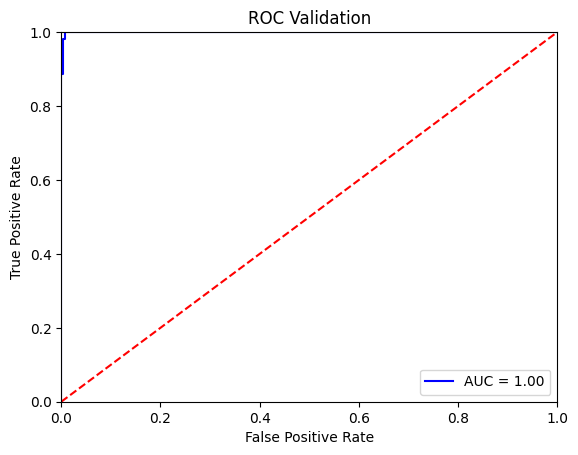

In [17]:
prob_predict_y_validation =best_estimator.predict_proba(x_test)
predictions_validation = prob_predict_y_validation[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions_validation)
    #
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

